In [2]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.messages import TextMessage
from autogen_agentchat.ui import Console
from autogen_core import CancellationToken
from autogen_ext.models.openai import OpenAIChatCompletionClient

In [3]:
import os
from dotenv import load_dotenv

load_dotenv()

model_name = os.environ["LLM_MODEL_NAME"]
api_key = os.environ["LLM_API_KEY"]
base_url = os.environ["OLLAMA_ENDPOINT"]

In [ ]:
# Define a tool that searches the web for information.
async def web_search(query: str) -> str:
    """Find information on the web"""
    return "AutoGen is a programming framework for building multi-agent applications."
 
model_client = OpenAIChatCompletionClient(
    model=model_name,
    api_key=api_key,
    base_url=base_url,
    model_info={
        "price": [0.0, 0.0],
        "vision":false,
        "function_calling":True,
        "json_output":True,
        "family":"granite3"},
)
agent = AssistantAgent(
    name="assistant",
    model_client=model_client,
    tools=[web_search],
    system_message="Use tools to solve tasks.",
)

In [6]:
async def assistant_run() -> None:
    response = await agent.on_messages(
        [TextMessage(content="Find information on AutoGen", source="user")],
        cancellation_token=CancellationToken(),
    )
    print(response.inner_messages)
    print(response.chat_message)


# Use asyncio.run(assistant_run()) when running in a script.
await assistant_run()

[ToolCallRequestEvent(source='assistant', models_usage=RequestUsage(prompt_tokens=165, completion_tokens=18), metadata={}, content=[FunctionCall(id='call_chdrplnn', arguments='{"query":"AutoGen"}', name='web_search')], type='ToolCallRequestEvent'), ToolCallExecutionEvent(source='assistant', models_usage=None, metadata={}, content=[FunctionExecutionResult(content='AutoGen is a programming framework for nothing.', name='web_search', call_id='call_chdrplnn', is_error=False)], type='ToolCallExecutionEvent')]
source='assistant' models_usage=None metadata={} content='AutoGen is a programming framework for nothing.' type='ToolCallSummaryMessage'



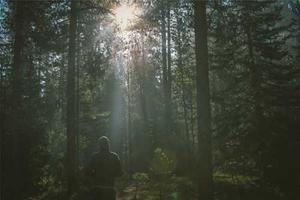

In [ ]:
# Make sure the LLM is supported vision
from io import BytesIO

import PIL
import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image

# Create a multi-modal message with random image and text.
pil_image = PIL.Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = Image(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="user")
img

In [13]:
# Use asyncio.run(...) when running in a script.
response = await agent.on_messages([multi_modal_message], CancellationToken())
print(response.chat_message.content)


What is that sunshine, like sunlight light, it like sunlight like sunlike like like like what's this we have got
